#### **This notebook plot the wordshift graph for targeted and non targeted tweets in Serbia and Egypt campaign**

In [1]:
import shifterator as sh
import pandas as pd
import numpy as np
import warnings
import importlib

#### packages
import helper.visualization as viz_hp
import config.config as config_hp

import copy
import helper.stat_helper as stat_hp

#### **Serbia: Load data**

In [2]:
serbia_non = './../data/serbia_english_non_targeted.pkl.gz'
serbia = './../data/serbia_target_english_tweets.pkl.gz'

In [3]:
df_serbia_non = pd.read_pickle(serbia_non)
df_serbia = pd.read_pickle(serbia)

#### **Serbia: Get most repeated words in targeted and non targeted tweets**

In [4]:
import helper.clean_tweet as cp_hp
import helper.visualization as viz_hp
import helper.helper as hp

importlib.reload(cp_hp)
importlib.reload(hp)

lang='en'
column='english_text'

########## Serbia Non target #########
df_non_words = cp_hp.preprocess_text(
    lang, 
    df_serbia_non, 
    column
)

non_wordlist = hp.get_most_repeated_word(df_non_words, 
                                         'filtered_text', 
                                         n=None,
                                         remove_word=None,
                                         count=True
                                        )
####### Serbia Target ###########
df_words = cp_hp.preprocess_text(
    lang, 
    df_serbia, 
    column
)

wordlist = hp.get_most_repeated_word(
    df_words, 
    'filtered_text',
    n=None,
    remove_word=None,
    count=True
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/potem/Quartz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/potem/Quartz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def create_dictionary(df):
    dict_target = {}
    for row in df.iterrows():
        dict_target[row[1]['filtered_text']] = row[1]['count']
        
    return dict_target

#### **Serbia: Wordshift Graph**

In [6]:
parameters = {
        'data': [],
        'figsize': (10, 10),
        'fontsize': 32,
        'tick_size': 28,
        'complementary': True,
        'figure_text': '(c)',
        'figure_text_x': 4000,
        'figure_text_y': 0.9,
        'figure_font': 28,
        'complementary': False,
        'columns': [
            {'column': 'diff_min',
             'label': 'IO',
            },{
            'column': 'diff_min',
             'label': 'Control'
            },
        ],
        'xlabel': 'Time difference in replying (in hour)',
        'ylabel': 'CDF',
        'legend_location': 'upper right',
        'log_xscale': True,
        'save': {
            'path': './../plots',
            'filename': 'serbia_wordshift.png'
        },
        'random_color': False
}


def figure(parameters):
    keys = parameters.keys()
    
    if 'figsize' in keys:
        size = parameters['figsize']
    else:
        size = (10,10)
        
    fig, ax = plt.subplots(figsize=size)
    
    return ax

/N/slate/potem/miniconda3/lib/python3.12/site-packages/shifterator/plotting.py:604: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


<Axes: xlabel='Difference in relative \n frequency of words (%)', ylabel='Rank'>

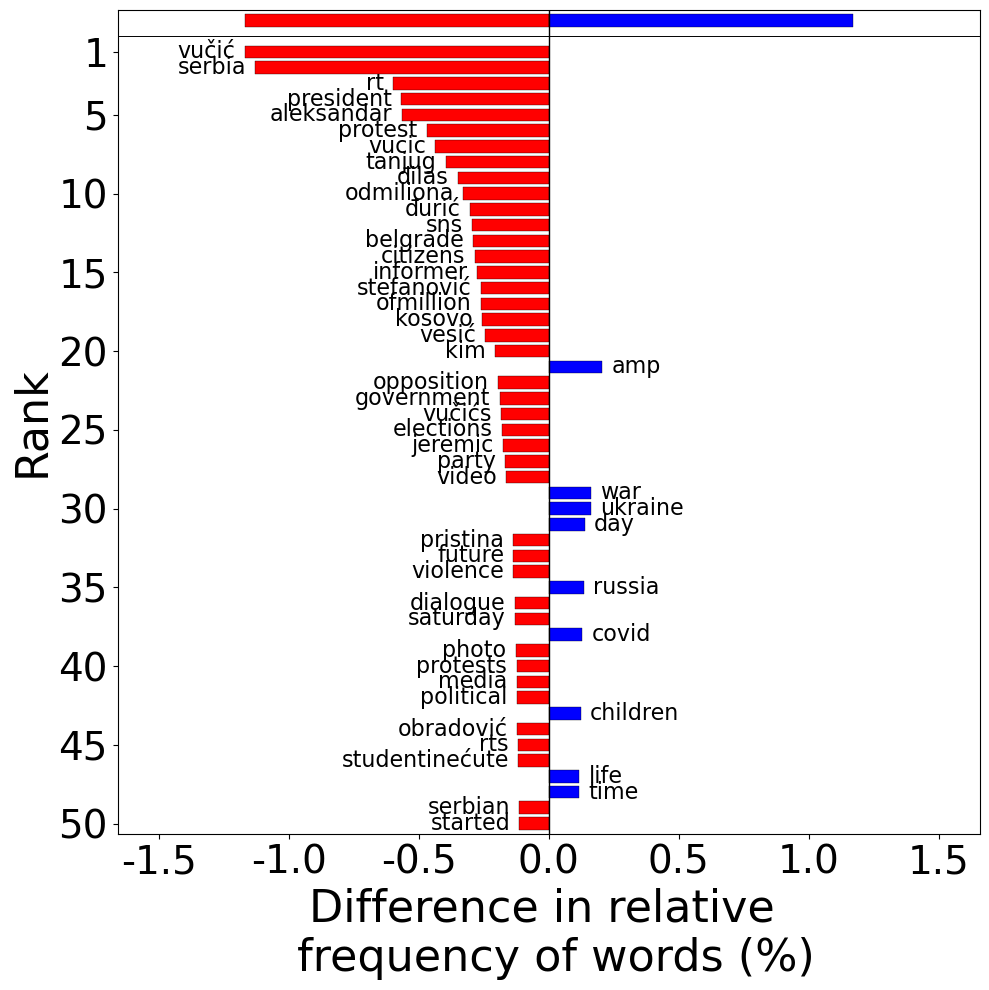

In [7]:
import matplotlib.pyplot as plt

ax = figure(parameters)
target = create_dictionary(wordlist)
non_target = create_dictionary(non_wordlist)

proportion_shift = sh.ProportionShift(type2freq_1=target,
                                      type2freq_2=non_target)
proportion_shift.get_shift_graph(
     # detailed=True,
    ax=ax,
     top_n=50,
    
    detailed=False,
     text_size_inset=False,
     cumulative_inset=False,
    show_plot=None,
     title='',
     filename='./../plots/serbia_words.png',
    system_names=['Targeted tweets', 'Control tweets'],
    tight=True,
    all_pos_contributions=False,
    # show_total=False,
    
    xlabel='Difference in relative \n frequency of words (%)',
    label_fontsize=16,
    xtick_fontsize=28,
    ytick_fontsize=28,
    xlabel_fontsize=32,
    ylabel_fontsize=32,
    score_colors={"neg_total": 'red',
                  'pos_total': 'blue',
                  'pos_s_pos_p': 'red',
                  'pos_s_neg_p': 'blue',
                  'pos_s': 'blue',
                  'neg_s': 'red'
                 },
    alpha_fade=0.5,
    pos_text_size_inset=[0.75, 0.65, 0.2, 0.2],
    pos_cumulative_inset= [0.2, 0.3, 0.175, 0.175],
    cumulative_xlabel= 'Sum of relative \nfrequency(%)',
    )

In [8]:
# https://arxiv.org/pdf/2008.02250

#### **Egpyt: Load data**

In [9]:
egypt_non = './../data/egypt_english_non_targeted.pkl.gz'
egypt = './../data/egypt_target_english_tweets.pkl.gz'

In [10]:
df_egypt_non = pd.read_pickle(egypt_non)
df_egypt = pd.read_pickle(egypt)

#### **Egypt: get most repeated words in targeted and non-targeted tweets**

In [11]:
import helper.clean_tweet as cp_hp
import helper.visualization as viz_hp
import helper.helper as hp

importlib.reload(cp_hp)
importlib.reload(hp)

lang='en'
column='english_text'
########## Egypt Non target #########
df_egypt_non_words = cp_hp.preprocess_text(
    lang, 
    df_egypt_non, 
    column
)

egypt_non_wordlist = hp.get_most_repeated_word(df_egypt_non_words, 
                                         'filtered_text', 
                                         n=None,
                                         remove_word=None,
                                         count=True
                                        )
####### Egypt Target ###########
df_egypt_words = cp_hp.preprocess_text(
    lang, 
    df_egypt, 
    column
)

egypt_wordlist = hp.get_most_repeated_word(
    df_egypt_words, 
    'filtered_text',
    n=None,
    remove_word=None,
    count=True
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/potem/Quartz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/N/slate/potem/miniconda3/lib/python3.12/site-packages/shifterator/plotting.py:604: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


<Axes: xlabel='Difference in relative \n frequency of words (%)', ylabel='Rank'>

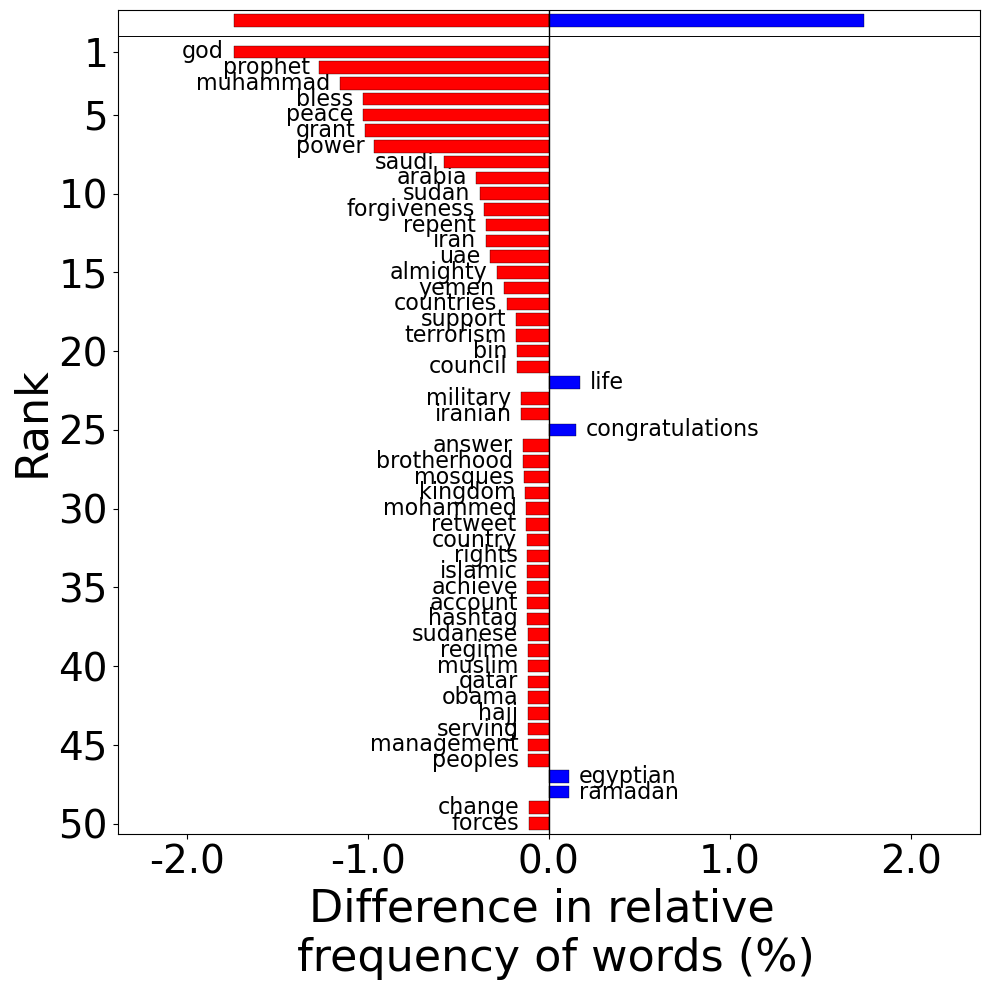

In [12]:
import matplotlib.pyplot as plt

ax = figure(parameters)
target = create_dictionary(egypt_wordlist)
non_target = create_dictionary(egypt_non_wordlist)

proportion_shift = sh.ProportionShift(type2freq_1=target,
                                      type2freq_2=non_target)
proportion_shift.get_shift_graph(
     # detailed=True,
    ax=ax,
    top_n=50,
    detailed=False,
    text_size_inset=False,
    cumulative_inset=False,
    show_plot=None,
    title='',
    filename='./../plots/egypt_words_without.png',
    system_names=['Targeted tweets', 'Control tweets'],
    tight=True,
    # all_pos_contributions=False,
    # show_total=True,
    
    xlabel='Difference in relative \n frequency of words (%)',
    label_fontsize=16,
    xtick_fontsize=28,
    ytick_fontsize=28,
    xlabel_fontsize=32,
    ylabel_fontsize=32,
    score_colors={"neg_total": 'red',
                  'pos_total': 'blue',
                  'pos_s_pos_p': 'red',
                  'pos_s_neg_p': 'blue',
                  'pos_s': 'blue',
                  'neg_s': 'red',
                  # 'all_pos_neg': 'red',
                  # 'all_pos_pos': 'blue'
                 },
    alpha_fade=0.5,
    pos_text_size_inset=[0.75, 0.65, 0.2, 0.2],
    pos_cumulative_inset= [0.2, 0.3, 0.175, 0.175],
    cumulative_xlabel= 'Sum of relative \nfrequency(%)',
    )